Data shape: (284807, 31)
Data columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255

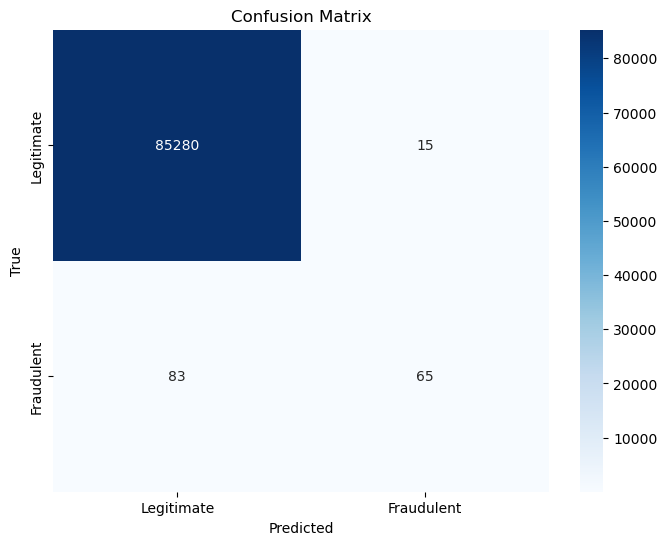

In [1]:
# Model training code, including functions:
# - sigmoid
# - compute_cost
# - compute_gradient
# - gradient_descent
# And model training steps:
# - Loading data
# - Splitting data


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
path = 'D:\\MachineLearninig\\Internship-Neevas\\Classification\\new\\archive\\creditcard.csv'  # Update with your file path
data = pd.read_csv(path)

# Display basic information about the dataset
print('Data shape:', data.shape)
print('Data columns:', data.columns)
print('First few rows of the dataset:')
print(data.head())

# Check for missing values
# print('\nMissing values:', data.isnull().sum().sum())

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept term to X
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
    return cost

# Gradient function
def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * X.T @ (h - y)
    return gradient

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []
    
    for _ in range(iterations):
        gradient = compute_gradient(X, y, theta)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
        
    return theta, costs

# Initialize parameters
theta = np.zeros((X_train.shape[1], 1))
learning_rate = 0.01
iterations = 1000

# Train the model using gradient descent
theta, costs = gradient_descent(X_train, y_train.values.reshape(-1, 1), theta, learning_rate, iterations)

# Make predictions
def predict(X, theta):
    probability = sigmoid(X @ theta)
    return (probability >= 0.5).astype(int)

y_pred = predict(X_test, theta)

# Evaluate the model
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
